<a href="https://colab.research.google.com/github/MazonSzymon/modelowanie_cen_akcji_spolek/blob/main/3_modele_szeregow_czasowych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importowanie bibliotek i danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
%load_ext google.colab.data_table
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')

In [3]:
!git clone https://github.com/MazonSzymon/modelowanie_cen_akcji_spolek.git
import sys
sys.path.append('/content/modelowanie_cen_akcji_spolek/')

Cloning into 'modelowanie_cen_akcji_spolek'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [4]:
our_stocks = pd.DataFrame(np.array([
                                    ['WI20','wig20.pl'],
                                    ['Alior Bank','alr.pl'],
                                    ['CD Projekt', 'cdr.pl'],
                                    ['Dino Polska', 'dnp.pl'],
                                    ['mBank', 'mbk.pl']
]), columns = ['Full_name','Stoq_name'])

def get_data(stock,start_date, end_date):
  stooq_data = pdr.get_data_stooq(stock['Stoq_name'], start = start_date, end = end_date).sort_index()
  stooq_data['Stock_name'] = stock['Full_name']
  df = stooq_data.copy()
  return df

def creat_WIG20_frame(start_date,end_date,stocks_list):
  WIG20 = pd.DataFrame()
  for i in range(len(stocks_list)):
    tmp = get_data(stocks_list.iloc[i],start_date,end_date)
    WIG20 = WIG20.append(tmp)
  return WIG20

In [5]:
start_date = dt.date(1991,1,1)
end_date = dt.date.today()
all_history_df = creat_WIG20_frame(start_date,end_date,our_stocks) #API, dont run many times!

In [6]:
start_date = dt.date(2020,1,1)
end_date = dt.date.today()
df = creat_WIG20_frame(start_date,end_date,our_stocks) #API, dont run many times!

In [7]:
df.drop( columns= ['Open','High','Low','Volume'],inplace = True)
df['Stock_name'] = df['Stock_name'].astype('category')

# 3. Modele szeregów czasowych

## CD Projekt 15 days 2k20

In [8]:
CD_Projekt_First15Days2k20 = df[df['Stock_name'] == 'CD Projekt'].head(15).Close.to_frame()
CD_Projekt_First15Days2k20

,Close
Date,
2020-01-02,286.8
2020-01-03,286.0
2020-01-07,283.8
2020-01-08,281.1
2020-01-09,288.6
2020-01-10,285.0
2020-01-13,290.6
2020-01-14,288.5
2020-01-15,283.2


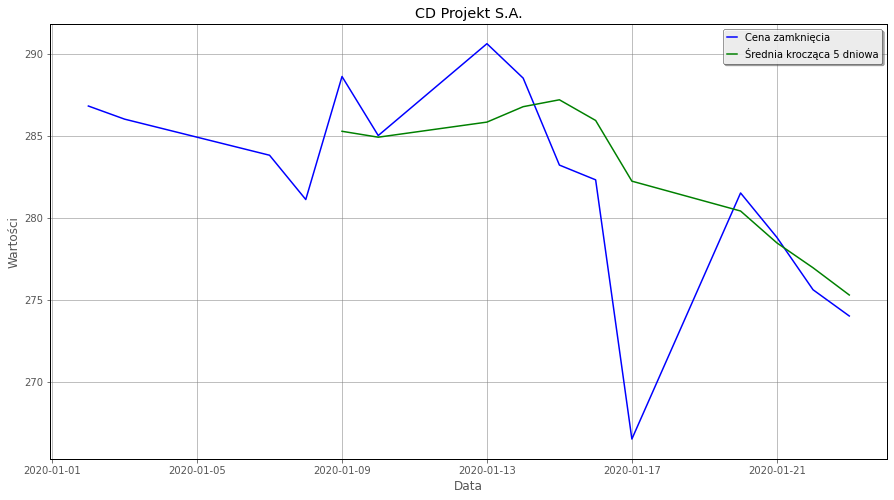

In [9]:
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Close'], color = 'blue',label = 'Cena zamknięcia')
plt.plot(CD_Projekt_First15Days2k20['Close'].rolling(5).mean(), color = 'green', label = 'Średnia krocząca 5 dniowa')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.legend()

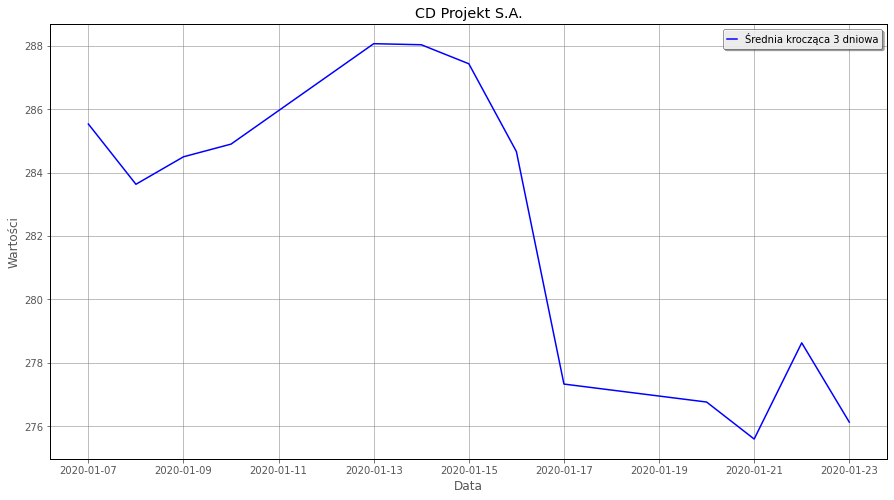

In [10]:
CD_Projekt_First15Days2k20['Mean'] = CD_Projekt_First15Days2k20['Close'].rolling(3).mean()
CD_Projekt_First15Days2k20
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Mean'], color = 'blue', label = 'Średnia krocząca 3 dniowa')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.legend()

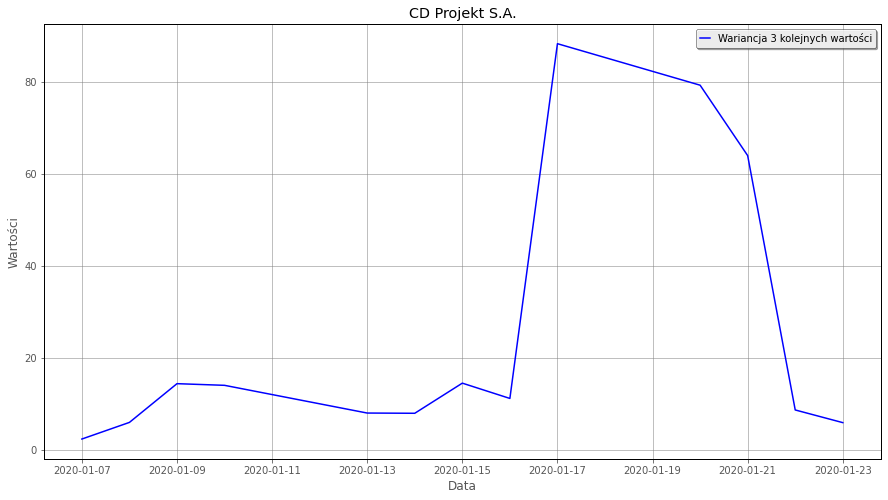

In [11]:
CD_Projekt_First15Days2k20['Variance'] = CD_Projekt_First15Days2k20['Close'].rolling(3).var()
CD_Projekt_First15Days2k20
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Variance'], color = 'blue', label = 'Wariancja 3 kolejnych wartości')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.legend()

In [12]:
CD_Projekt_First15Days2k20['X'] = CD_Projekt_First15Days2k20.reset_index().index.values+1

In [13]:
CD_Projekt_First15Days2k20  

,Close,Mean,Variance,X
Date,,,,
2020-01-02,286.8,NaN,NaN,1
2020-01-03,286.0,NaN,NaN,2
2020-01-07,283.8,285.533333,2.413333,3
2020-01-08,281.1,283.633333,6.023333,4
2020-01-09,288.6,284.500000,14.430000,5
2020-01-10,285.0,284.900000,14.070000,6
2020-01-13,290.6,288.066667,8.053333,7
2020-01-14,288.5,288.033333,8.003333,8
2020-01-15,283.2,287.433333,14.543333,9


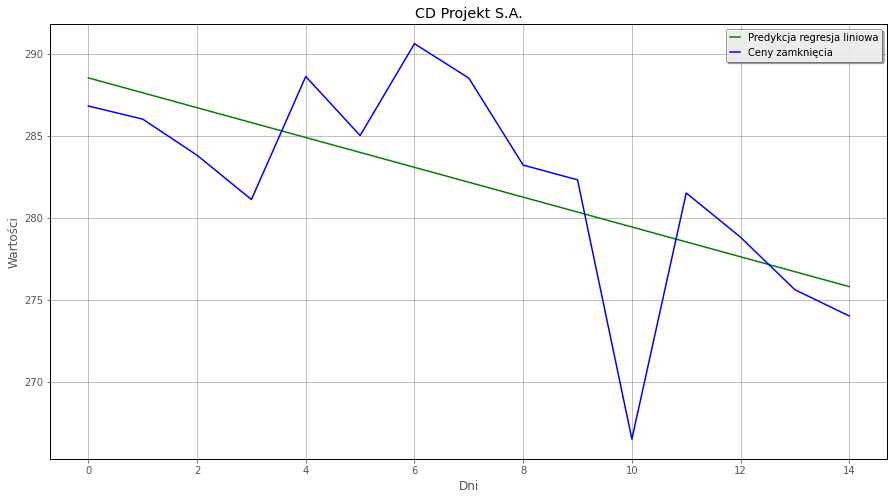

y= -0.91 x +  289.42


In [14]:
import numpy as np
from sklearn import datasets, linear_model
#########
y = CD_Projekt_First15Days2k20[['Close']]#.iloc[3:]
X = CD_Projekt_First15Days2k20[['X']]#.iloc[3:]
#########
# Create linear regression object
model = linear_model.LinearRegression().fit(X,y)
m = model.coef_[0]
b = model.intercept_
# Predict values
plt.figure(figsize=(15,8))
plt.plot(model.predict(X),color = 'green',label = 'Predykcja regresja liniowa')
plt.plot(CD_Projekt_First15Days2k20['Close'].values, color = 'blue',label = 'Ceny zamknięcia')
plt.xlabel('Dni')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()
print('y=',round(m[0],2),'x + ',round(b[0],2))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


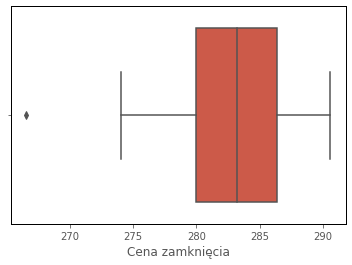

In [15]:
sns.boxplot(CD_Projekt_First15Days2k20.rename(columns = {'Close' : 'Cena zamknięcia'})['Cena zamknięcia'])

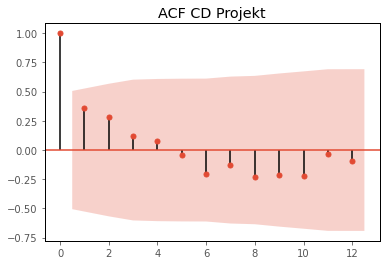

In [16]:
sgt.plot_acf(CD_Projekt_First15Days2k20['Close'],title='ACF CD Projekt').show()

In [17]:
pd.DataFrame(sgt.acf(CD_Projekt_First15Days2k20['Close'])).round(3).rename(columns = {0:'ACF'}).to_csv('CDProjektACF15Days.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


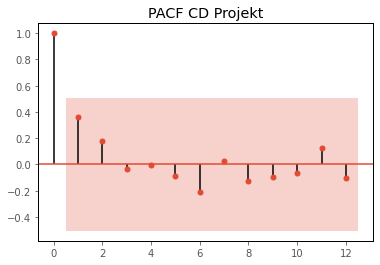

In [18]:
sgt.plot_pacf(CD_Projekt_First15Days2k20['Close'],title='PACF CD Projekt', method ='ldb').show()

In [19]:
pd.DataFrame(sgt.pacf(CD_Projekt_First15Days2k20['Close'],method= 'ldb', nlags = 14).round(3)).rename(columns = {0:'PACF'}).to_csv('CDProjektPACF15Days.csv')

In [20]:
CD_Projekt_2k20 = df[(df['Stock_name'] == 'CD Projekt') & (df.index < dt.datetime(2021,1,1))]
CD_Projekt_2k20.drop(columns='Stock_name',inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
CD_Projekt_2k20.head(10).to_csv('CD_Projekt_2k20_FIRST10.csv')

## CD Projekt 2k20

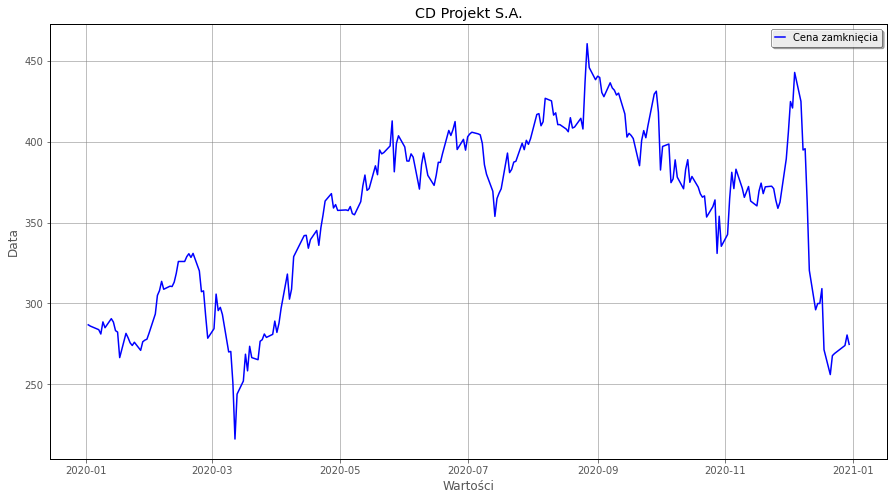

In [22]:
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_2k20['Close'],color = 'blue', label = 'Cena zamknięcia')
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

In [23]:
tmp = CD_Projekt_2k20['Close'].pct_change()

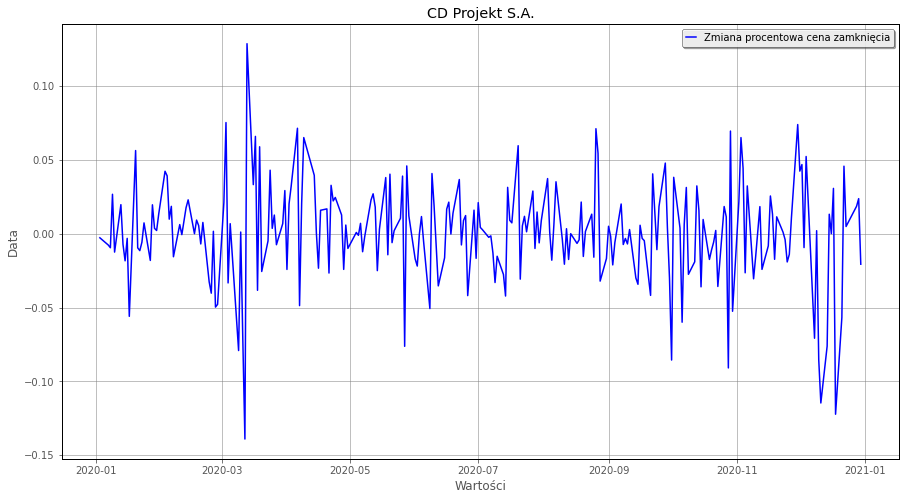

In [24]:
plt.figure(figsize=(15,8))
plt.plot(tmp,color = 'blue', label = 'Zmiana procentowa cena zamknięcia')
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
def ADF_test(data):
  X = data.fillna(0).values
  result = adfuller(X)
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Critical Values:')
  for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
  else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [26]:
ADF_test(tmp)

ADF Statistic: -15.985432459418309
p-value: 6.762372804614536e-29
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


In [27]:
tmp.head()

Date
2020-01-02         NaN
2020-01-03   -0.002789
2020-01-07   -0.007692
2020-01-08   -0.009514
2020-01-09    0.026681
Name: Close, dtype: float64

In [28]:
tmp.iloc[1:].head()

Date
2020-01-03   -0.002789
2020-01-07   -0.007692
2020-01-08   -0.009514
2020-01-09    0.026681
2020-01-10   -0.012474
Name: Close, dtype: float64

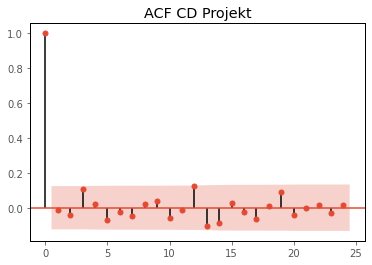

In [29]:
sgt.plot_acf(tmp.iloc[1:],title='ACF CD Projekt').show()

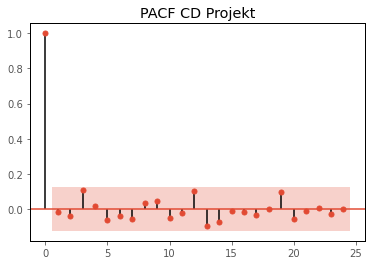

In [30]:
sgt.plot_pacf(tmp.iloc[1:],title='PACF CD Projekt', method ='ldb').show()

In [31]:
tmp = CD_Projekt_2k20['Close'].rolling(3).mean()
tmp = tmp.pct_change()
tmp.head(10)

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-07         NaN
2020-01-08   -0.006654
2020-01-09    0.003056
2020-01-10    0.001406
2020-01-13    0.011115
2020-01-14   -0.000116
2020-01-15   -0.002083
2020-01-16   -0.009625
Name: Close, dtype: float64

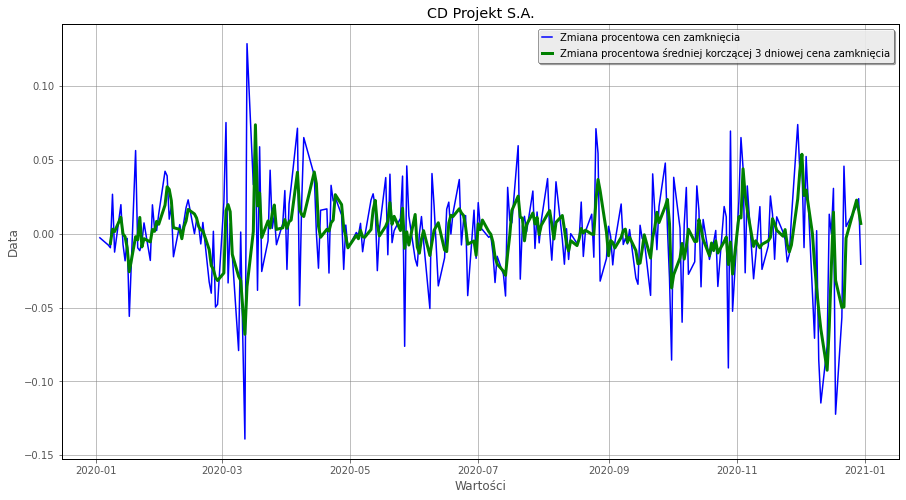

In [32]:
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_2k20['Close'].pct_change(), color= 'blue', label = 'Zmiana procentowa cen zamknięcia')
plt.plot(tmp,color = 'green', label = 'Zmiana procentowa średniej korczącej 3 dniowej cena zamknięcia', linewidth = 3)
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

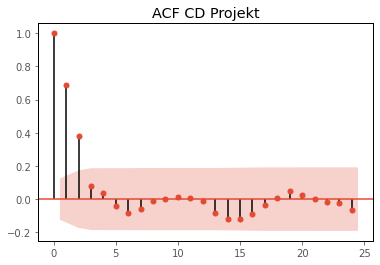

In [33]:
sgt.plot_acf(tmp.iloc[3:],title='ACF CD Projekt').show()

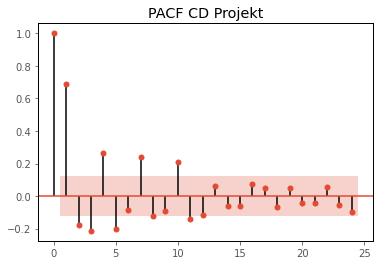

In [34]:
sgt.plot_pacf(tmp.iloc[3:],title='PACF CD Projekt', method ='ldb').show()

In [35]:
def acf_and_pacf(data,n_lags):
  sgt.plot_acf(data.iloc[n_lags:], alpha = 0.05, zero = False)
  plt.grid()
  plt.title('Autocorrelation function',size = 20)
  plt.show()
  sgt.plot_pacf(data.iloc[n_lags:], alpha = 0.05, zero = False)
  plt.grid()
  plt.title('Parial Autocorrelation function', size = 20 )
  plt.show()

### MA(3)

In [36]:
from statsmodels.tsa.arima_model import ARMA
model_ar = ARMA(tmp.iloc[3:], order = (0,3))
results_ar = model_ar.fit()
results_ar.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  249
Model:                     ARMA(0, 3)   Log Likelihood                 755.069
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sun, 14 Feb 2021   AIC                          -1500.139
Time:                        20:24:37   BIC                          -1482.552
Sample:                             0   HQIC                         -1493.060
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.523e-05      0.002      0.012      0.990      -0.004       0.004
ma.L1.Close     0.9720      0.063     15.478      0.000       0.849       1.095
ma.L2.Close     0.9066      0.066     13.781      0.000       0.778       1.036
ma.L3.Close    -0.0034      0.066     -0.052      0.959      -0.133       0.126
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.5360           -0.9007j            1.0481           -0.3354
MA.2           -0.5360           +0.9007j            1.0481            0.3354
MA.3          266.0602           -0.0000j          266.0602           -0.0000
-----------------------------------------------------------------------------
"""

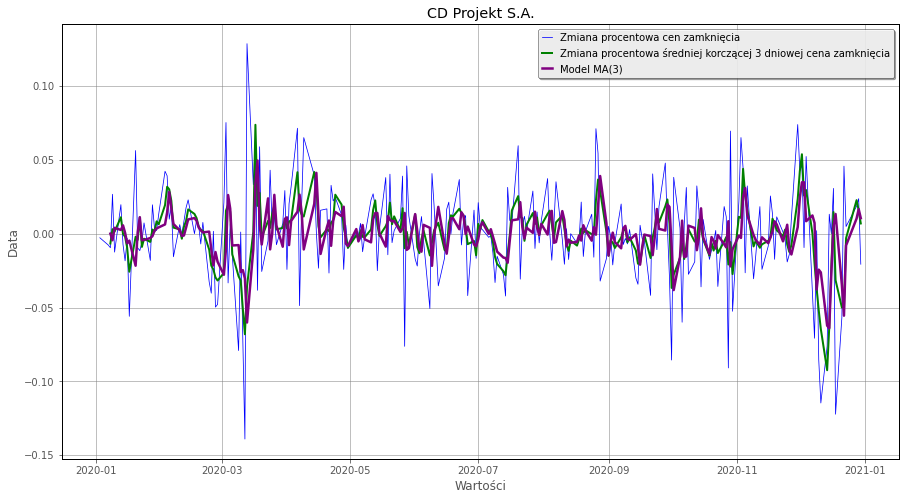

In [37]:
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_2k20['Close'].pct_change(), color= 'blue', label = 'Zmiana procentowa cen zamknięcia', linewidth = 0.75)
plt.plot(tmp,color = 'green', label = 'Zmiana procentowa średniej korczącej 3 dniowej cena zamknięcia', linewidth = 2)
plt.plot(results_ar.predict(), color = 'purple',label = 'Model MA(3)', linewidth = 2.5)
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

### AR(2)

In [38]:
from statsmodels.tsa.arima_model import ARMA
model_ar = ARMA(tmp.iloc[3:], order = (2,0))
results_ar = model_ar.fit()
results_ar.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  249
Model:                     ARMA(2, 0)   Log Likelihood                 713.128
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sun, 14 Feb 2021   AIC                          -1418.257
Time:                        20:24:38   BIC                          -1404.187
Sample:                             0   HQIC                         -1412.593
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.365e-05      0.002      0.010      0.992      -0.005       0.005
ar.L1.Close     0.8108      0.062     13.027      0.000       0.689       0.933
ar.L2.Close    -0.1781      0.062     -2.861      0.005      -0.300      -0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2767           -0.6578j            2.3698           -0.0448
AR.2            2.2767           +0.6578j            2.3698            0.0448
-----------------------------------------------------------------------------
"""

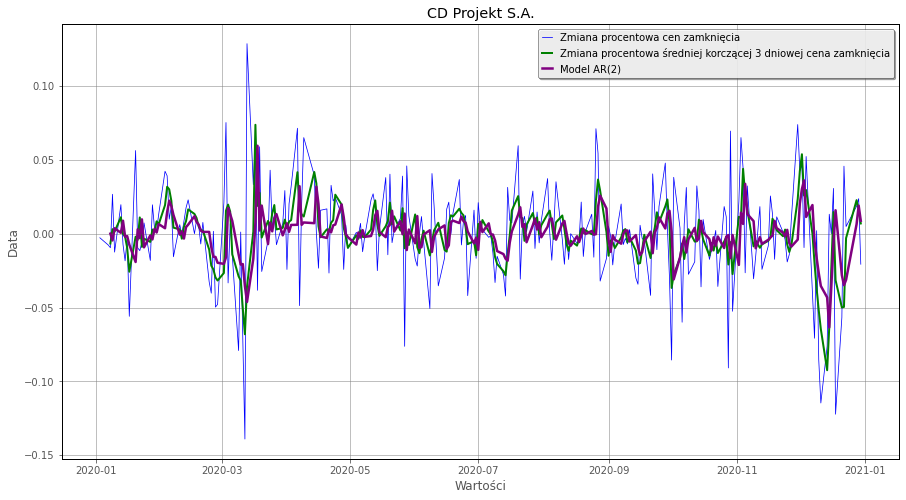

In [39]:
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_2k20['Close'].pct_change(), color= 'blue', label = 'Zmiana procentowa cen zamknięcia', linewidth = 0.75)
plt.plot(tmp,color = 'green', label = 'Zmiana procentowa średniej korczącej 3 dniowej cena zamknięcia', linewidth = 2)
plt.plot(results_ar.predict(), color = 'purple',label = 'Model AR(2)', linewidth = 2.5)
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

### ARMA(2,3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  249
Model:                     ARMA(3, 1)   Log Likelihood                 725.937
Method:                       css-mle   S.D. of innovations              0.013
Date:                Sun, 14 Feb 2021   AIC                          -1439.873
Time:                        20:24:39   BIC                          -1418.769
Sample:                             0   HQIC                         -1431.378
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.812e-06      0.002     -0.002      0.998      -0.004       0.004
ar.L1.Close     0.2757      0.105      2.626      0.009       0.070       0.481
ar.L2.Close     0.4347      0.080      5.412    

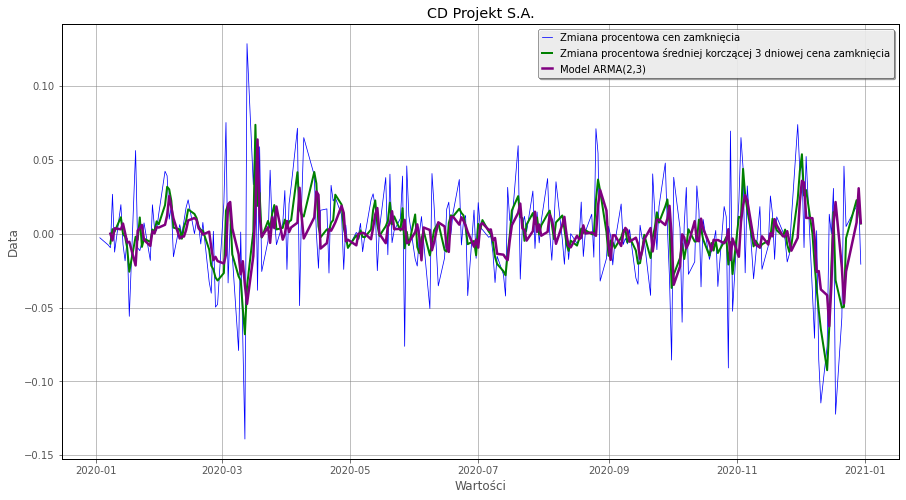

In [40]:
from statsmodels.tsa.arima_model import ARMA
model_ar = ARMA(tmp.iloc[3:], order = (3,1))
results_ar = model_ar.fit()
print(results_ar.summary())
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_2k20['Close'].pct_change(), color= 'blue', label = 'Zmiana procentowa cen zamknięcia', linewidth = 0.75)
plt.plot(tmp,color = 'green', label = 'Zmiana procentowa średniej korczącej 3 dniowej cena zamknięcia', linewidth = 2)
plt.plot(results_ar.predict(), color = 'purple',label = 'Model ARMA(2,3)', linewidth = 2.5)
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

### AR(2) VS MA(3)

In [41]:
tmp = CD_Projekt_2k20['Close'].rolling(3).mean()
tmp = tmp.pct_change()
tmp.head(10)

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-07         NaN
2020-01-08   -0.006654
2020-01-09    0.003056
2020-01-10    0.001406
2020-01-13    0.011115
2020-01-14   -0.000116
2020-01-15   -0.002083
2020-01-16   -0.009625
Name: Close, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


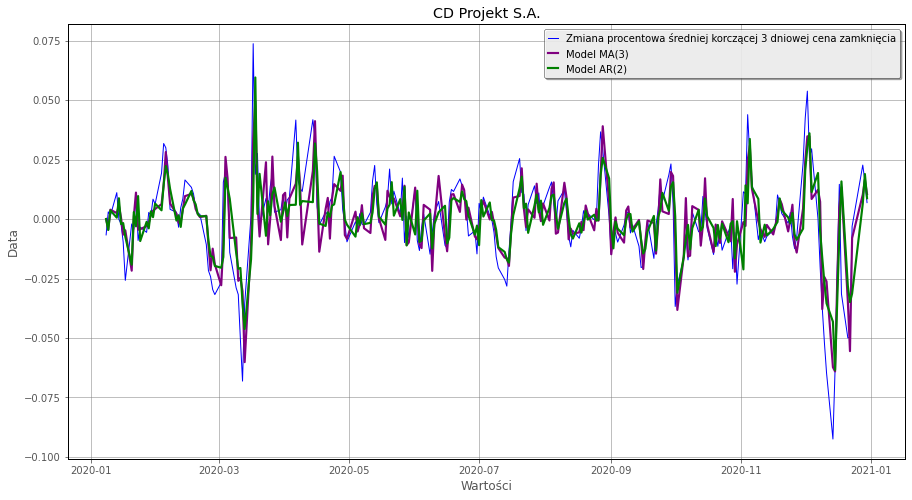

In [42]:
# MA(3)
model_ma_3 = ARMA(tmp.iloc[3:], order = (0,3))
results_ma_3 = model_ma_3.fit()
# AR(2)
model_ar_2 = ARMA(tmp.iloc[3:], order = (2,0))
results_ar_2 = model_ar_2.fit()

#Print
plt.figure(figsize=(15,8))
plt.plot(tmp,color = 'blue', label = 'Zmiana procentowa średniej korczącej 3 dniowej cena zamknięcia', linewidth = 1)
plt.plot(results_ma_3.predict(), color = 'purple',label = 'Model MA(3)', linewidth = 2.15)
plt.plot(results_ar_2.predict(), color = 'green',label = 'Model AR(2)', linewidth = 2.15)
plt.xlabel('Wartości')
plt.ylabel('Data')
plt.title('CD Projekt S.A.')
plt.grid()
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
AR_2_MSE = mean_squared_error(tmp.iloc[3:], results_ar_2.predict())
MA_3_MSE = mean_squared_error(tmp.iloc[3:], results_ma_3.predict())
print('MSE dla AR(2) = ',AR_2_MSE.round(5))
print('MSE dla MA(3) = ',MA_3_MSE.round(5))

MSE dla AR(2) =  0.00019
MSE dla MA(3) =  0.00013


In [44]:
from sklearn.metrics import r2_score
AR_2_r2 = r2_score(tmp.iloc[3:], results_ar_2.predict())
AR_2_adjr2 = 1 - (1 - AR_2_r2)*(len(tmp.iloc[3:]) - 1)/(len(tmp.iloc[3:]) - 2 - 1)
MA_3_r2 = r2_score(tmp.iloc[3:], results_ma_3.predict())
MA_3_adjr2 = 1 - (1 - MA_3_r2)*(len(tmp.iloc[3:]) - 1)/(len(tmp.iloc[3:]) - 3 - 1)
print('R2 dla AR(2) = ', AR_2_r2.round(5))
print('R2 dla MA(3) = ', MA_3_r2.round(5))
print('Adj R2 dla AR(2)', AR_2_adjr2.round(5))
print('Adj R2 dla MA(3)', MA_3_adjr2.round(5))

R2 dla AR(2) =  0.49258
R2 dla MA(3) =  0.64009
Adj R2 dla AR(2) 0.48845
Adj R2 dla MA(3) 0.63568


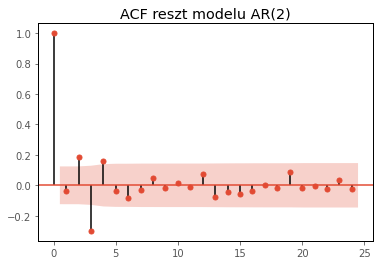

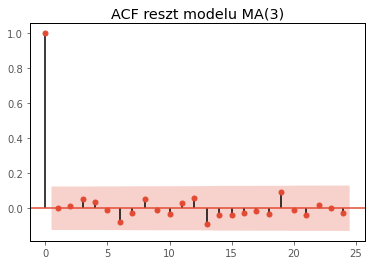

In [45]:
residuals_AR2 = tmp.iloc[3:] - results_ar_2.predict()
residuals_MA3 = tmp.iloc[3:] - results_ma_3.predict()
sgt.plot_acf(residuals_AR2,title='ACF reszt modelu AR(2)').show()
sgt.plot_acf(residuals_MA3,title='ACF reszt modelu MA(3)').show()


In [46]:
print(results_ar_2.summary2())

                           Results: ARMA
Model:              ARMA             BIC:                 -1404.1868
Dependent Variable: Close            Log-Likelihood:      713.13    
Date:               2021-02-14 20:24 Scale:               1.0000    
No. Observations:   249              Method:              css-mle   
Df Model:           3                Sample:              0         
Df Residuals:       246                                   9         
Converged:          1.0000           S.D. of innovations: 0.014     
No. Iterations:     14.0000          HQIC:                -1412.593 
AIC:                -1418.2567                                      
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             0.0000    0.0024   0.0100  0.9920  -0.0046   0.0047
ar.L1.Close       0.8108    0.0622  13.0273  0.0000   0.68

In [47]:
print(results_ma_3.summary2())

                           Results: ARMA
Model:              ARMA             BIC:                 -1482.5517
Dependent Variable: Close            Log-Likelihood:      755.07    
Date:               2021-02-14 20:24 Scale:               1.0000    
No. Observations:   249              Method:              css-mle   
Df Model:           4                Sample:              0         
Df Residuals:       245                                   9         
Converged:          1.0000           S.D. of innovations: 0.012     
No. Iterations:     36.0000          HQIC:                -1493.060 
AIC:                -1500.1389                                      
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
const          0.0000     0.0021    0.0120   0.9904   -0.0041   0.0041
ma.L1.Close    0.9720     0.0628   15.4779   0.0000   

### ARMA

In [129]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARMAResults 
ARMA_df = pd.DataFrame(columns=['p','q','AIC'])
for p in range(0,5):
  for q in range(0,5):
    try:
      model_arma = ARMA(tmp.iloc[3:], (p,q))
      result_arma = model_arma.fit()
      model_df = pd.DataFrame([[p,q,result_arma.aic]]).rename(columns=({0 : 'p', 1 : 'q', 2 : 'AIC'}))
      ARMA_df = ARMA_df.append(model_df)
      #print(f'For ARMA({p},{q}) AIC = {round(result_arma.aic,5)}')
    except:
      model_df = pd.DataFrame([[p,q,np.NaN]]).rename(columns=({0 : 'p', 1 : 'q', 2 : 'AIC'}))
      ARMA_df = ARMA_df.append(model_df)
      #print(f'For ARMA({p},{q}) cant fit model')

In [139]:
str(ARMA_df[ARMA_df['AIC'] == ARMA_df['AIC'].min()]['q'].values[0])

'2'

In [205]:
def TheBestModelByAIC(data, max_p, max_q):
  import warnings
  warnings.filterwarnings('ignore')
  ARMA_df = pd.DataFrame(columns = ['p','q','AIC'])
  for p in range(0, max_p):
    for q in range(0, max_q):
      try:
        model_arma = ARMA(data,(p,q))
        result_arma = model_arma.fit()
        model_df = pd.DataFrame([[p,q,result_arma.aic]]).rename(columns=({0 : 'p', 1 : 'q', 2 : 'AIC'}))
        ARMA_df = ARMA_df.append(model_df)
      except:
        model_df = pd.DataFrame([[p,q,np.NaN]]).rename(columns=({0 : 'p', 1 : 'q', 2 : 'AIC'}))
        ARMA_df = ARMA_df.append(model_df)
      TheBestModel_df = ARMA_df[ARMA_df['AIC'] == ARMA_df['AIC'].min()]
  TheBestModel = ARMA(data, (TheBestModel_df['p'].values[0],TheBestModel_df['q'].values[0]))
  result_TheBestModel = TheBestModel.fit()
  plt.figure(figsize=(15,8))
  plt.title(f'ARMA({str(TheBestModel_df["p"].values[0])},{str(TheBestModel_df["q"].values[0])})')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.plot(data, color = 'Blue', label  = 'Orginal')
  plt.plot(result_TheBestModel.predict(), color = 'Green', label = 'Predict', linewidth = 2)
  plt.legend()
  plt.grid()
  plt.show()
  print(f'The best model is ARMA({str(TheBestModel_df["p"].values[0])},{str(TheBestModel_df["q"].values[0])}) with AIC = {str(TheBestModel_df["AIC"].values[0])}')
  return result_TheBestModel
 

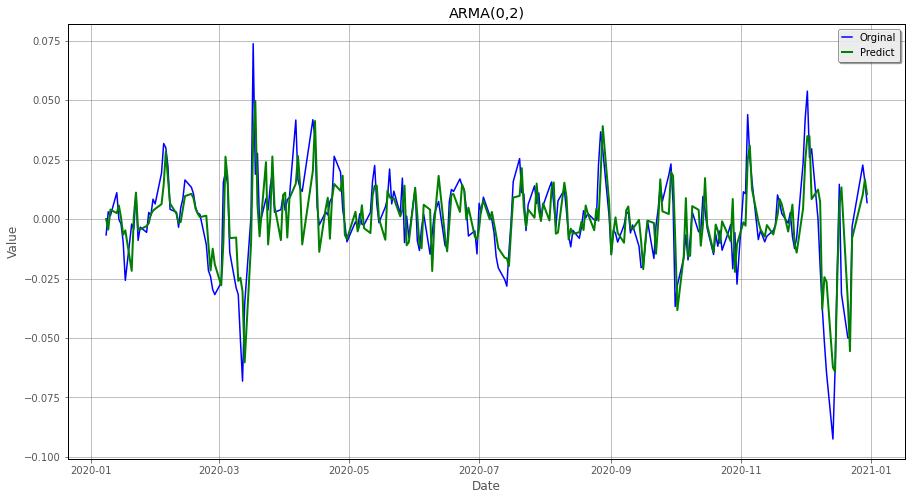

The best model is ARMA(0,2) with AIC = -1502.1362363966482


In [206]:
TheBestModelByAIC(tmp.iloc[3:],5,5)